In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


seed = 173
np.random.seed(seed)

In [49]:
import skimage.io as skio
i1k = []
i2k = []
i2k5c = []
images = [i1k, i2k, i2k5c]

# Retrieving all the images, inverting them
for div in range(3):
    for digit in range(10):
        images[div].append(np.array([np.invert(img) for img in skio.imread_collection(f"data/{div}/{digit}/*.png")]))
    
    images[div] = np.array(images[div])

<ipython-input-49-89197da4ce5b>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  images[div] = np.array(images[div])


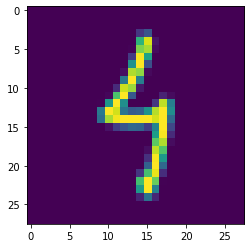

In [50]:
plt.imshow(images[0][4][0]);


In [51]:
# Into the dataframe you go
for div in range(3):
    for digit in range(10):
        images[div][digit] = pd.DataFrame([i.reshape(28*28) for i in images[div][digit]])
        images[div][digit]["label"] = digit
    images[div] = pd.concat(images[div], axis=0, ignore_index=True)
images = pd.concat(images, axis=0, ignore_index=True).astype(int)

In [52]:
images

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5505,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
5506,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
5507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
5508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [54]:
images.to_csv("drawings_non_binary.csv", index=False)